# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# https://api.openweathermap.org/data/2.5/weather? q=London&appid={API key}


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    print(city_url)
    
    #break

    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Processing Record 36 of Set 1 | kurilsk
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
  

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    #print(city_weather)
    #break        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=ushuaia
Processing Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=torbay
Processing Record 2 of Set 1 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=purpe
Processing Record 3 of Set 1 | purpe
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=bethel
Processing Record 4 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=victoria
Processing Record 5 of Set 1 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=nikolskoye
Processing Record 6 of Set 1 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=atbasar
Processing Record 3 of Set 2 | atbasar
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=bluff
Processing Record 4 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=port+alfred
Processing Record 5 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=chokurdakh
Processing Record 6 of Set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=saint-avertin
Processing Record 7 of Set 2 | saint-avertin
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=bambous+virieux
Processing Record 8 of Set 2 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7f

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=rungata
Processing Record 6 of Set 3 | rungata
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=russell
Processing Record 7 of Set 3 | russell
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=chicama
Processing Record 8 of Set 3 | chicama
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=mecca
Processing Record 9 of Set 3 | mecca
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tanete
Processing Record 10 of Set 3 | tanete
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=mehamn
Processing Record 11 of Set 3 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=fuerte+olimpo
Processing Record 9 of Set 4 | fuerte olimpo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=yumen
Processing Record 10 of Set 4 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tomatlan
Processing Record 11 of Set 4 | tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=alice+springs
Processing Record 12 of Set 4 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=lephepe
Processing Record 13 of Set 4 | lephepe
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=airai
Processing Record 14 of Set 4 | airai
http://api.openweathermap.org/data/2.5/weather?units=Metric&A

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=codrington
Processing Record 15 of Set 5 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=ostrovnoy
Processing Record 16 of Set 5 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=kazalinsk
Processing Record 17 of Set 5 | kazalinsk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tsihombe
Processing Record 18 of Set 5 | tsihombe
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=srednekolymsk
Processing Record 19 of Set 5 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=clyde+river
Processing Record 20 of Set 5 | clyde river
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=geraldton
Processing Record 20 of Set 6 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=beckley
Processing Record 21 of Set 6 | beckley
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=bage
Processing Record 22 of Set 6 | bage
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=afsin
Processing Record 23 of Set 6 | afsin
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=agirish
Processing Record 24 of Set 6 | agirish
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=ola
Processing Record 25 of Set 6 | ola
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=talnakh
Processing 

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=coihaique
Processing Record 25 of Set 7 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=deshna
Processing Record 26 of Set 7 | deshna
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=zeya
Processing Record 27 of Set 7 | zeya
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=puerto+cabezas
Processing Record 28 of Set 7 | puerto cabezas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=chapaevsk
Processing Record 29 of Set 7 | chapaevsk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=grand+river+south+east
Processing Record 30 of Set 7 | grand river south east
City not found. Skipping...
http:/

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=chavakkad
Processing Record 30 of Set 8 | chavakkad
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tecoanapa
Processing Record 31 of Set 8 | tecoanapa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=dukat
Processing Record 32 of Set 8 | dukat
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sisimiut
Processing Record 33 of Set 8 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=yaan
Processing Record 34 of Set 8 | yaan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=matias+barbosa
Processing Record 35 of Set 8 | matias barbosa
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c75

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=mazabuka
Processing Record 34 of Set 9 | mazabuka
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=rorvik
Processing Record 35 of Set 9 | rorvik
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=rognan
Processing Record 36 of Set 9 | rognan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=longyearbyen
Processing Record 37 of Set 9 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=beyneu
Processing Record 38 of Set 9 | beyneu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=atambua
Processing Record 39 of Set 9 | atambua
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=noumea
Processing Record 38 of Set 10 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=omboue
Processing Record 39 of Set 10 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tual
Processing Record 40 of Set 10 | tual
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=hare+bay
Processing Record 41 of Set 10 | hare bay
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=bathsheba
Processing Record 42 of Set 10 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=benghazi
Processing Record 43 of Set 10 | benghazi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=f

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=krasnokamensk
Processing Record 43 of Set 11 | krasnokamensk
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=bilma
Processing Record 44 of Set 11 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sumbawa
Processing Record 45 of Set 11 | sumbawa
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=camabatela
Processing Record 46 of Set 11 | camabatela
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=batagay-alyta
Processing Record 47 of Set 11 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=skalistyy
Processing Record 48 of Set 11 | skalistyy
City not found. Skipping...
http://api.ope

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=porto+recanati
Processing Record 48 of Set 12 | porto recanati
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=rindal
Processing Record 49 of Set 12 | rindal
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=inongo
Processing Record 0 of Set 13 | inongo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=tilichiki
Processing Record 1 of Set 13 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=sao+jose+da+coroa+grande
Processing Record 2 of Set 13 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=a4607d7fa959cb161e4fe00c7545620e&q=peno
Processing Record 3 of Set 13 | peno
http://api.openweathermap.org/data/2.5/weather?units=Metric&AP

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [16]:
city_data

[{'City': 'ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 9.79,
  'Humidity': 92,
  'Cloudiness': 93,
  'Wind Speed': 2.32,
  'Country': 'AR',
  'Date': 1679758521},
 {'City': 'torbay',
  'Lat': 47.6666,
  'Lng': -52.7314,
  'Max Temp': 1.05,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 16.99,
  'Country': 'CA',
  'Date': 1679758552},
 {'City': 'purpe',
  'Lat': 64.4803,
  'Lng': 76.6897,
  'Max Temp': -3.55,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 4.13,
  'Country': 'RU',
  'Date': 1679758552},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 5.67,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 6.17,
  'Country': 'US',
  'Date': 1679758552},
 {'City': 'victoria',
  'Lat': 22.2855,
  'Lng': 114.1577,
  'Max Temp': 21.81,
  'Humidity': 95,
  'Cloudiness': 99,
  'Wind Speed': 0.45,
  'Country': 'HK',
  'Date': 1679758266},
 {'City': 'nikolskoye',
  'Lat': 59.7035,
  'Lng': 30.7861,
  'Max Temp': 2.94,
  'Humidity': 84,
  'Clo

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,9.79,92,93,2.32,AR,1679758521
1,torbay,47.6666,-52.7314,1.05,96,100,16.99,CA,1679758552
2,purpe,64.4803,76.6897,-3.55,94,100,4.13,RU,1679758552
3,bethel,41.3712,-73.4140,5.67,79,100,6.17,US,1679758552
4,victoria,22.2855,114.1577,21.81,95,99,0.45,HK,1679758266


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.79,92,93,2.32,AR,1679758521
1,torbay,47.6666,-52.7314,1.05,96,100,16.99,CA,1679758552
2,purpe,64.4803,76.6897,-3.55,94,100,4.13,RU,1679758552
3,bethel,41.3712,-73.4140,5.67,79,100,6.17,US,1679758552
4,victoria,22.2855,114.1577,21.81,95,99,0.45,HK,1679758266
5,nikolskoye,59.7035,30.7861,2.94,84,100,4.77,RU,1679758552
6,upernavik,72.7868,-56.1549,-23.12,80,23,1.46,GL,1679758552
7,mahuva,21.0914,71.7622,25.24,49,1,5.43,IN,1679758553
8,ribeira grande,38.5167,-28.7000,15.43,82,75,8.05,PT,1679758553


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

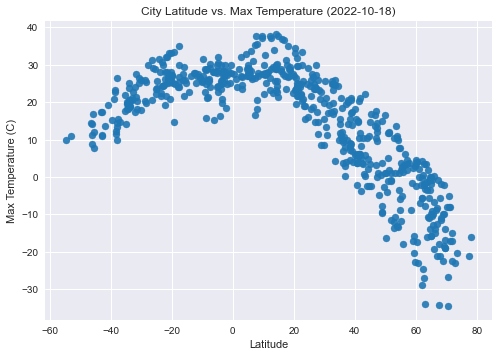

In [60]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            marker="o", 
            c='tab:blue', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid(True)

                  
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

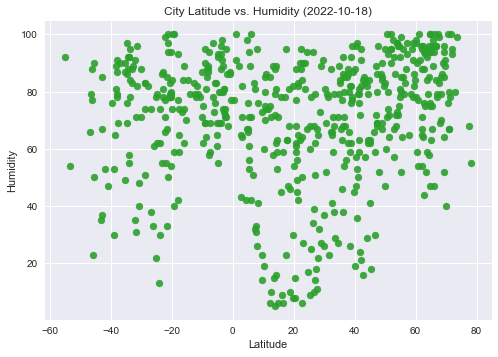

In [66]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], 
            marker="o", 
            c='tab:green', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

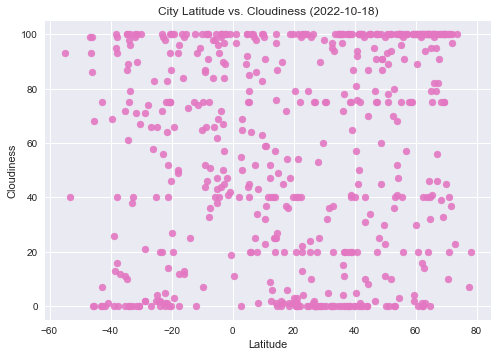

In [67]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], 
            marker="o", 
            c='tab:pink', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

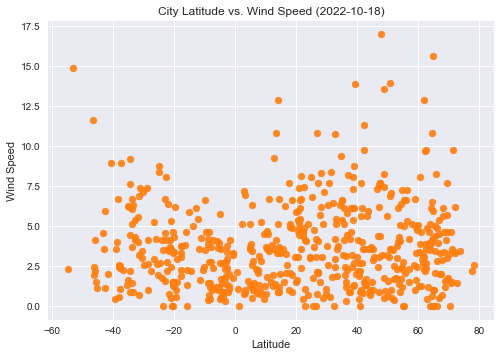

In [68]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            marker="o", 
            c='tab:orange', 
            alpha=0.9)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)
# Save the figure

plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE